# NYPD Allegations
* **See the main project notebook for instructions to be sure you satisfy the rubric!**
* See Project 03 for information on the dataset.
* A few example prediction questions to pursue are listed below. However, don't limit yourself to them!
    * Predict the outcome of an allegation (might need to feature engineer your output column).
    * Predict the complainant or officer ethnicity.
    * Predict the amount of time between the month received vs month closed (difference of the two columns).
    * Predict the rank of the officer.

Be careful to justify what information you would know at the "time of prediction" and train your model using only those features.

# Summary of Findings


### Introduction


##### Prediction Problem and classification
To move forward from project 3, I will predict the ethnicity of complainants. Since the values of ethnicity of complainants are categorical values, I will use the classfication model to predict the ethnicity. For the classfication model, I will use Decision Tree so that I can get the predictions of complainants whether they are Black, White, Asian, Hispanic, American Indian, or other race.


##### Target varibale
The target variable is ethnicity of complainants. The values of ethinicity of complainants in "complainant_ethnicity" column are categorical values (nominal) as 'Black', 'White', 'Asian', 'Hispanic', 'American Indian', or 'Other race'


##### Evaluation metric
Evaluation metric of my model will be the accuracy score of it. The accuracy score is one of the popular evaluation metric which demonstrate as percentage. It my accuracy score is close to 100% and higher then it means my model predict ethnicity of complainant correctly.

### Baseline Model
Among the columns in nypd file, I chose 11 columns ('mos_age_incident', 'mos_ethnicity', 'mos_gender', 'complainant_gender','complainant_age_incident','fado_type','allegation','contact_reason', 'outcome_description','board_disposition', 'rank_abbrev_incident') which seems to have statistically significant correlation with ethnicity of complainant column.

I made a DecisionTreeClassidier and foud feature_importances of each columns in bar graph so that I can view the importances of each columns.In the bar graph, I found out that the 4 columns (board_disposition, contact_reason, complainant_age_incident, complainant_gender) were the highest top 4 important columns. I built the baseline model with the four columns.

##### Number of Features: 4
##### Features: 'board_disposition (Nominal)', 'contact_reason' (Nominal), 'complainant_gender' (Nominal), 'complainant_age_incident' (Quantitative)

I used OneHotEncoded function to nominal columns since the columns is categorical and should be transfromed to quantitative to perform classification model.

##### The model performance
- Train accuracy score : 0.753035143769968
- Test accuracy score : 0.6449248353832774

The test accuracy score is about 65% which means my model predicts complainant_ethnicity correctly at 65%. Even though it is above 50%, it is still not very good model since my model can result wrong prediction with 35%.

### Final Model
First, I added twi more features ('mos_ethnicity', 'mos_age_incident') to improve my model accuracy score. The reason why I chose 'mos_ethnicity' feature was that it was the fifth highest important features. And the reason why I added 'mos_age_incident' was that it was another quantitative feature which might improve my model. I used OneHotEncoded function to perform my model for categorical features. Also, I added more feature engineering function which was StandardScaler function for age columns ('complainant_age_incident', 'mos_age_incident') to improve my model. Added model accuracy score improved from 65% to 72%.

##### The model performance
- Train accuracy score : 0.9570287539936102
- Test accuracy score : 0.7276680332960617

##### Added Features: 'mos_ethnicity' (nominal), 'mos_age_incident' (quantitative)
##### reason: fifth best important feature, another quantitative feature
#####  feature engineering: StandardScaler (quantitative), OneHotEncoded (nominal)

However, the test accuracy score was improved by about 7%, the train accuracy score was improved a lot which means that my model was overfitted. To handle the problem of overfitting, I used GridSearchCV method to make my model robust. For the GridSearchCV, I would find out the best parameters of max_depth, min_samples_split, and min_samples_leaf for my DecisionTreeClassifier.

##### Model Type
- DecisionTreeClassifier

##### best parameters
- {'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 3}

##### the method of model selection used
- GridSearchCV

##### The model performance after GridSearchCV
- Train accuracy score : 0.8652289669861555
- Test accuracy score : 0.6833146974779476

Using the best parameters, train accuracy score was about 87% and test accuracy score was about 68%. It improved my model to less overfit to train data. However, both accuracies was decreased.

### Fairness Evaluation

<!-- Interesting subset: “mos_ethnicity”
Parity Measure: Accuracy
Test statistic: difference in Accuracy between ‘White’ subset and the ‘Non-White’
subset
Significance level: 0.05
p-value : 0.016
Result : Since the p-value is less than the signicance level, I reject the null hypothesis
that my model is fair. -->

The target variable of my model was to predict race of complainant. According to the data, 'mos_ethinicity' values were interesting for me since the values are uniquely same values in my target column ('complainant_ethnicity'). Thus I chose 'mos_ethinicity' to construct my "interesting subset" 

As you see in the bar graph, the number of white police officers was much more higher than other number of races'. Thus, I decided to binarize my subset by threshold that police officer is whether white or not.

##### Interesting subset: white or not white in 'mos_ethnicity'
##### Parity Measure: accuracy score

For the permutation test, I set my null and alternative hypothesises as this

- Null Hypothesis: my model is fair; the accuracy score for my two subsets are roughly the same

- Alternative Hypothesis: my model is unfair; the accuracy score for the White subset is higher than the Not White subset

- Test statistic: difference in accuracy score between white or not white in 'mos_ethnicity'

- Significance level: 0.05

After the permutation test, the p-value was 0.068.
The p-value is higher than 0.05 (significant level) so that I can not reject my null hypothesis. To conclude, my model was unfair and the accuracy score for the White subset is higher than the Not White subset.

# Code

In [268]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

### Baseline Model

In [456]:
nypd = pd.read_csv("allegations_202007271729.csv")
for_graph = nypd
# missing values : 'Not described', 'Gender non-conforming', 'Unknown', 'refused'
nypd = nypd.replace({'Unknown':np.nan, 'Refused':np.nan, 'Not described':np.nan, 'Gender':np.nan, 'non-conforming':np.nan})

# removed Nans
nypd = nypd.dropna()
nypd

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
5,10012,Paula,Smith,078 PCT,4021,37256,5,2017,10,2017,...,50,White,Male,31.0,Abuse of Authority,Refusal to process civilian complaint,78.0,C/V telephoned PCT,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Discourtesy,Word,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33354,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Interference with recording,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33355,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Search (of person),66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)
33356,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Vehicle search,66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)


In [457]:
# dataFrame with selected columns
nypd = nypd[['mos_age_incident', 'mos_ethnicity', 'mos_gender','complainant_ethnicity', 
      'complainant_gender','complainant_age_incident','fado_type','allegation','contact_reason',
      'outcome_description','board_disposition', 'rank_abbrev_incident']]

nypd

,mos_age_incident,mos_ethnicity,mos_gender,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,contact_reason,outcome_description,board_disposition,rank_abbrev_incident
0,32,Hispanic,M,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),POM
1,24,White,M,Black,Male,26.0,Discourtesy,Action,Moving violation,Moving violation summons issued,Substantiated (Charges),POM
2,24,White,M,Black,Male,26.0,Offensive Language,Race,Moving violation,Moving violation summons issued,Substantiated (Charges),POM
3,25,White,M,Black,Male,45.0,Abuse of Authority,Question,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),POM
5,50,Black,F,White,Male,31.0,Abuse of Authority,Refusal to process civilian complaint,C/V telephoned PCT,No arrest made or summons issued,Substantiated (Command Lvl Instructions),SGT
...,...,...,...,...,...,...,...,...,...,...,...,...
33353,36,White,M,Asian,Male,21.0,Discourtesy,Word,Moving violation,Moving violation summons issued,Unsubstantiated,POM
33354,36,White,M,Asian,Male,21.0,Abuse of Authority,Interference with recording,Moving violation,Moving violation summons issued,Unsubstantiated,POM
33355,36,White,M,Asian,Male,21.0,Abuse of Authority,Search (of person),Moving violation,Moving violation summons issued,Substantiated (Formalized Training),POM
33356,36,White,M,Asian,Male,21.0,Abuse of Authority,Vehicle search,Moving violation,Moving violation summons issued,Substantiated (Formalized Training),POM


In [464]:
 # Made DecisionTreeClassifier to find important features using feature_importances_
X = nypd.drop('complainant_ethnicity', axis = 1)
y = nypd.complainant_ethnicity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
ct = ColumnTransformer([('label', OneHotEncoder(handle_unknown = 'ignore'),['mos_ethnicity', 'mos_gender',
                                                                                'complainant_gender', 'fado_type', 'allegation',
                                                                                'contact_reason','outcome_description',
                                                                               'board_disposition', 'rank_abbrev_incident'])],remainder = 'passthrough')
pl = Pipeline([('feats', ct),('clf', DecisionTreeClassifier())])
pl.fit(X_train, y_train)

Pipeline(steps=[('feats',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('label',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['mos_ethnicity',
                                                   'mos_gender',
                                                   'complainant_gender',
                                                   'fado_type', 'allegation',
                                                   'contact_reason',
                                                   'outcome_description',
                                                   'board_disposition',
                                                   'rank_abbrev_incident'])])),
                ('clf', DecisionTreeClassifier())])

[('outcome_description', 0.0), ('rank_abbrev_incident', 0.00012910270772099777), ('mos_age_incident', 0.00031202545426474914), ('allegation', 0.003150951743611863), ('mos_gender', 0.003154187233947342), ('fado_type', 0.004503990711536357), ('mos_ethnicity', 0.004807470812837453), ('complainant_gender', 0.00969040827608447), ('complainant_age_incident', 0.010710409594484433), ('board_disposition', 0.012981523796387595), ('contact_reason', 0.013935360892937988)]


<AxesSubplot:>

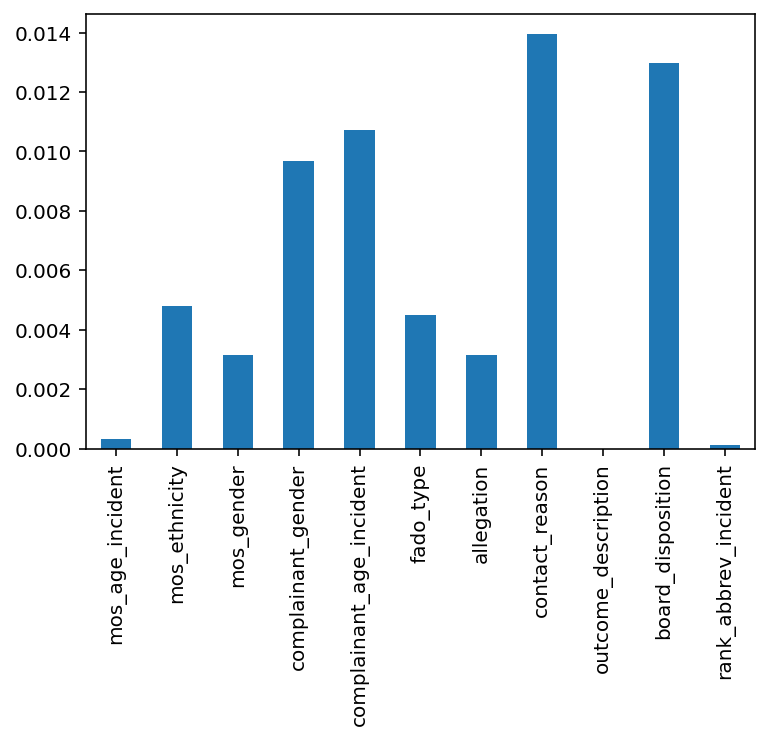

In [465]:
feature_importances = pl.named_steps['clf'].feature_importances_
feature_dict = dict(zip(X.columns,feature_importances))
df = pd.DataFrame(feature_dict.values(), feature_dict.keys())
print(sorted(feature_dict.items(), key=lambda x: x[1]))
df[0].plot.bar()

In [468]:
#maximum depth
pl.named_steps['clf'].tree_.max_depth

51

In [469]:
# Baseline model
X = nypd[['board_disposition', 'contact_reason', 'complainant_gender', 'complainant_age_incident']]
y = nypd.complainant_ethnicity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
ct = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown = 'ignore'),
                             ['board_disposition', 'contact_reason', 'complainant_gender'])],remainder = 'passthrough')
pl = Pipeline([('feats', ct),('clf', DecisionTreeClassifier())])
pl.fit(X_train, y_train)

Pipeline(steps=[('feats',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['board_disposition',
                                                   'contact_reason',
                                                   'complainant_gender'])])),
                ('clf', DecisionTreeClassifier())])

In [470]:
# Accuracy
print('Train accuracy score : ' + str(pl.score(X_train, y_train)))
print('Test accuracy score : ' + str(pl.score(X_test, y_test)))

Train accuracy score : 0.753035143769968
Test accuracy score : 0.6449248353832774


### Final Model

In [471]:
# Added more features and feature engineering
X = nypd[['board_disposition', 'contact_reason', 'complainant_gender', 'complainant_age_incident', 
          'mos_ethnicity', 'mos_age_incident']]
y = nypd.complainant_ethnicity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
ct = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown = 'ignore'),
                             ['board_disposition', 'contact_reason', 'complainant_gender', 'mos_ethnicity']),
                            ('stdscale', StandardScaler(), ['complainant_age_incident', 'mos_age_incident'])])
pl = Pipeline([('feats', ct),('clf', DecisionTreeClassifier())])
pl.fit(X_train, y_train)

Pipeline(steps=[('feats',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['board_disposition',
                                                   'contact_reason',
                                                   'complainant_gender',
                                                   'mos_ethnicity']),
                                                 ('stdscale', StandardScaler(),
                                                  ['complainant_age_incident',
                                                   'mos_age_incident'])])),
                ('clf', DecisionTreeClassifier())])

In [472]:
# Accuracy score
print('Train accuracy score : ' + str(pl.score(X_train, y_train)))
print('Test accuracy score : ' + str(pl.score(X_test, y_test)))

Train accuracy score : 0.9570287539936102
Test accuracy score : 0.7276680332960617


In [474]:
parameters = {
    'max_depth': [2,3,4,5,7,10,13,15,18,20,25,30, 35, 40,None], 
    'min_samples_split':[2,3,5,7,10,15,20],
    'min_samples_leaf':[2,3,5,7,10,15,20]
}

In [475]:
# apply gridsearchcv
X = nypd[['board_disposition', 'contact_reason', 'complainant_gender', 'complainant_age_incident', 
          'mos_ethnicity', 'mos_age_incident']]
y = nypd.complainant_ethnicity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
ct = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown = 'ignore'),
                             ['board_disposition', 'contact_reason', 'complainant_gender', 'mos_ethnicity']),
                            ('stdscale', StandardScaler(), ['complainant_age_incident', 'mos_age_incident'])])
pl = Pipeline([('feats', ct),('gscv', GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5))])
pl.fit(X_train, y_train)

Pipeline(steps=[('feats',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['board_disposition',
                                                   'contact_reason',
                                                   'complainant_gender',
                                                   'mos_ethnicity']),
                                                 ('stdscale', StandardScaler(),
                                                  ['complainant_age_incident',
                                                   'mos_age_incident'])])),
                ('gscv',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              param_grid={'max_depth': [2, 3, 4, 5, 7, 10, 13,
                                                        15, 18, 20, 25, 30, 35,
                                                    

In [476]:
grid_search = pl.named_steps['gscv']
grid_search.best_params_

{'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 3}

In [478]:
print('Train accuracy score : ' + str(pl.score(X_train, y_train)))
print('Test accuracy score : ' + str(pl.score(X_test, y_test)))

Train accuracy score : 0.8652289669861555
Test accuracy score : 0.6833146974779476


### Fairness Evaluation

Text(0, 0.5, 'Count')

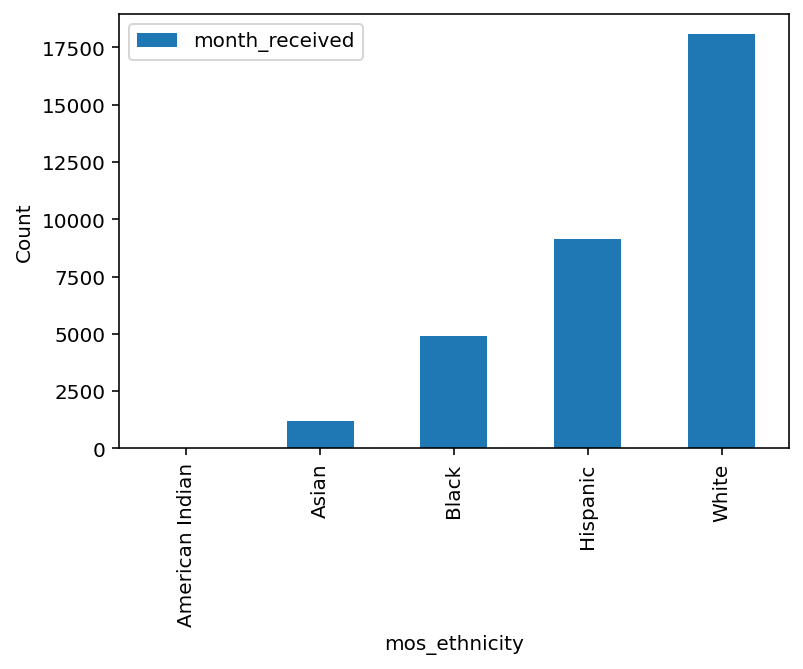

In [479]:
for_graph.groupby('mos_ethnicity').agg({'month_received': 'count'}).plot(kind = 'bar')
plt.xlabel('mos_ethnicity')
plt.ylabel('Count')

In [494]:
X = nypd[['board_disposition', 'contact_reason', 'complainant_gender', 'complainant_age_incident', 
          'mos_ethnicity', 'mos_age_incident']]
y = nypd.complainant_ethnicity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
df = X_test
df['white'] = df['mos_ethnicity'] == 'White'
df['pred'] = pl.predict(X_test)
df['og_value'] = y_test
obs_df = df.groupby('white').apply(lambda x: metrics.accuracy_score(x.og_value, x.pred))
obv_stat = obs_df.diff().iloc[-1]

<ipython-input-494-98beff115840>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['white'] = df['mos_ethnicity'] == 'White'
C:\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "
<ipython-input-494-98beff115840>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred'] = pl.predict(X_t

In [495]:
lst = []
for i in range(1000):
    
    shuffled_white = (
        df['white']
        .sample(replace=False, frac = 1)
        .reset_index(drop=True)
    )
    
    shuffled = (
        df
        .assign(**{'Shuffled': shuffled_white})
    )
    
    group = shuffled.groupby('Shuffled').apply(lambda x: metrics.accuracy_score(x.og_value, x.pred))
    lst.append(group.diff().iloc[-1])

In [499]:
p_value = (pd.Series(lst) <= obv_stat).mean()
print('P-value : ' + str(p_value))

P-value : 0.068
